<a href="https://colab.research.google.com/github/ZakiLazuardi987/PCVK_Ganjil_2024/blob/main/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

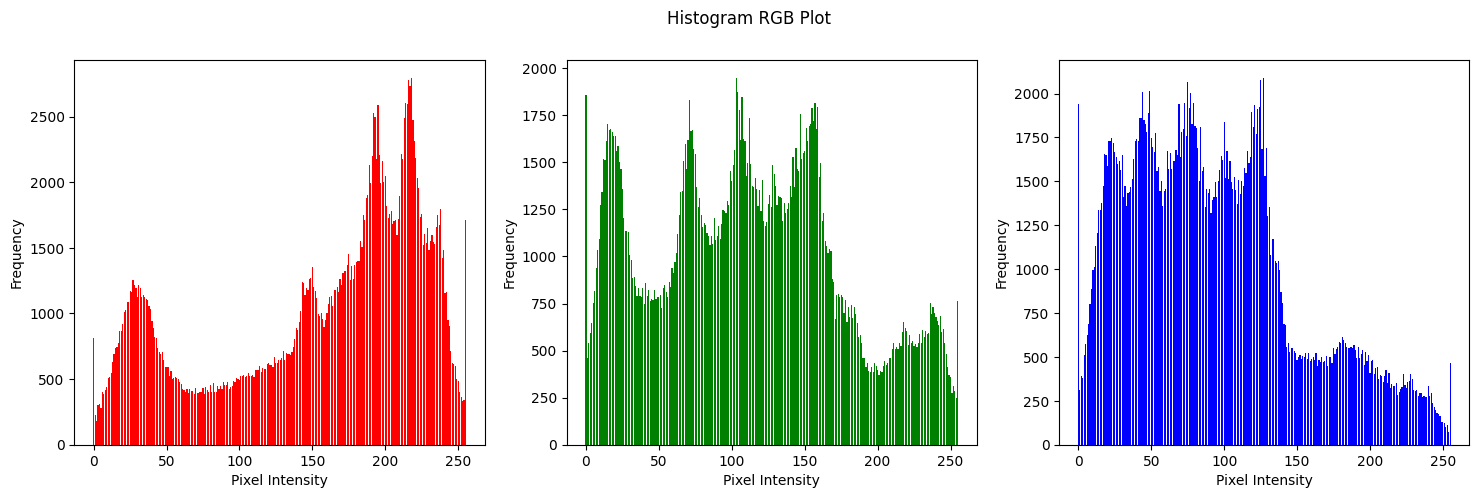

In [ ]:
# Let's add the path as a parameter for the image so it's clear where the image is being loaded from

# Path to the image
image = cv.imread('/content/drive/MyDrive/Tugas PCVK/Images/lena.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Reload the image and plot histograms again, including the image path as part of the figure's title
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Colors and titles for each channel
colors = ('r', 'g', 'b')

# Plot each histogram separately with the image path
for i, color in enumerate(colors):
    hist = cv.calcHist([image_rgb], [i], None, [256], [0, 256])
    axs[i].bar(range(256), hist.ravel(), color=color)
    axs[i].set_xlabel('Pixel Intensity')
    axs[i].set_ylabel('Frequency')

# Main title for the plot
fig.suptitle('Histogram RGB Plot')

# Display the histograms
plt.show()


4.	Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

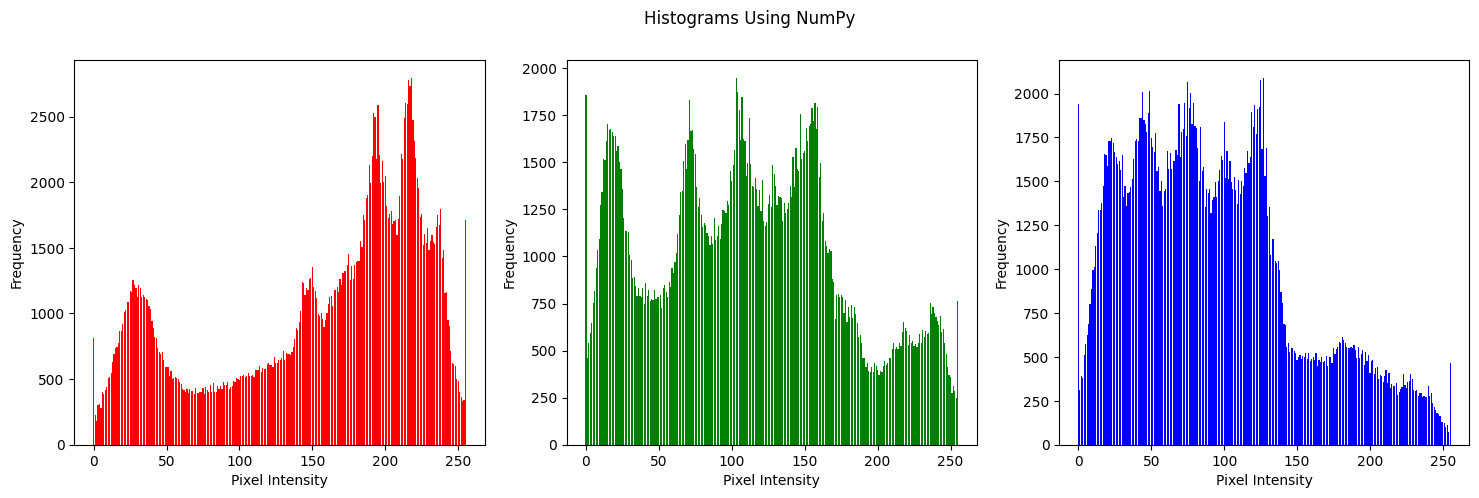

In [ ]:
# Using numpy's histogram to calculate histograms for each color channel
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot each histogram separately using numpy.histogram
for i, color in enumerate(colors):
    # Flatten the image channel into a 1D array and calculate the histogram using numpy
    hist_np, bins = np.histogram(image_rgb[:, :, i].ravel(), bins=256, range=(0, 256))
    axs[i].bar(range(256), hist_np, color=color)
    axs[i].set_xlabel('Pixel Intensity')
    axs[i].set_ylabel('Frequency')

# Display the histograms calculated using NumPy
fig.suptitle('Histograms Using NumPy')
plt.show()

5.	Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

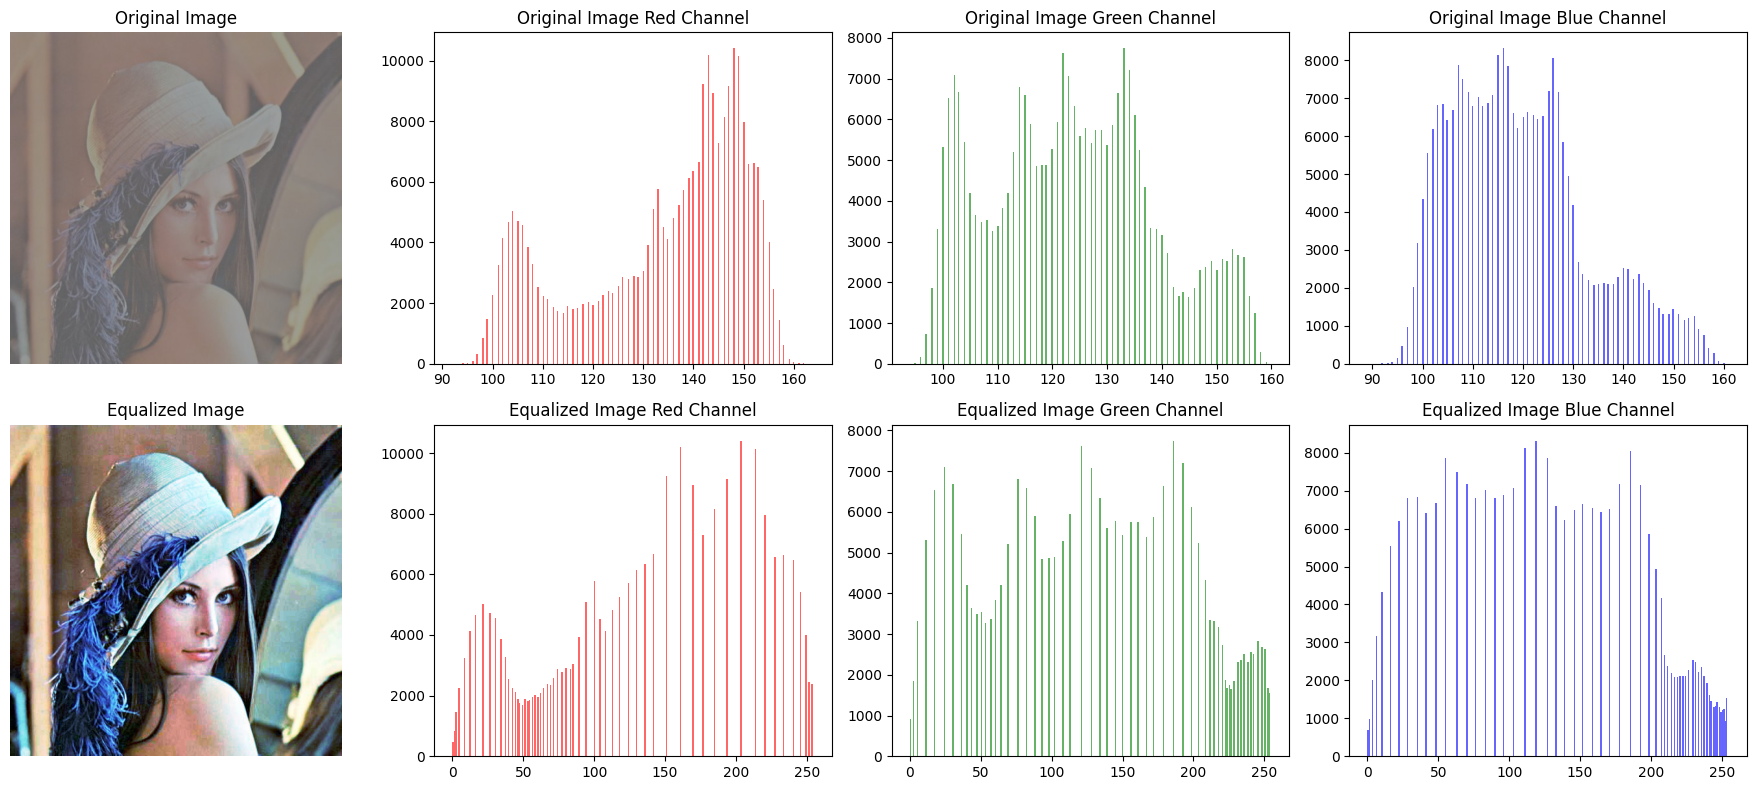

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Update the image path
image_path = '/content/drive/MyDrive/Tugas PCVK/Images/lena_lc.jpg'

# Load the image
img_original = Image.open(image_path)

# Convert the original image to RGB and process each channel for histogram equalization
def histogram_equalization_rgb(image):
    img_array = np.array(image)

    # Separate the color channels
    r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]

    # Equalize each channel
    r_eq, _, _ = histogram_equalization(Image.fromarray(r))
    g_eq, _, _ = histogram_equalization(Image.fromarray(g))
    b_eq, _, _ = histogram_equalization(Image.fromarray(b))

    # Combine equalized channels back into one image
    img_eq_rgb = np.stack([r_eq, g_eq, b_eq], axis=-1).astype(np.uint8)

    return img_eq_rgb

# Define the histogram equalization function
def histogram_equalization(image):
  image_array = np.array(image)
  histogram, bins = np.histogram(image_array.flatten(), bins=256, range=[0,256])
  cdf = histogram.cumsum()
  cdf_normalized = cdf * histogram.max() / cdf.max()
  cdf_m = np.ma.masked_equal(cdf, 0)
  cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
  cdf = np.ma.filled(cdf_m, 0).astype('uint8')
  img_eq = cdf[image_array]
  return img_eq, cdf, histogram

# Perform histogram equalization for each color channel
img_eq_rgb = histogram_equalization_rgb(img_original)

# Function to plot the RGB histograms
def plot_histogram(image, ax, title):
    img_array = np.array(image)
    ax[0].hist(img_array[:,:,0].flatten(), bins=256, color='red', alpha=0.6)
    ax[0].set_title(f'{title} Red Channel')
    ax[1].hist(img_array[:,:,1].flatten(), bins=256, color='green', alpha=0.6)
    ax[1].set_title(f'{title} Green Channel')
    ax[2].hist(img_array[:,:,2].flatten(), bins=256, color='blue', alpha=0.6)
    ax[2].set_title(f'{title} Blue Channel')

# Create figure for displaying images and histograms
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

# Display original image and its histograms
axs[0, 0].imshow(img_original)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

plot_histogram(img_original, axs[0, 1:], "Original Image")

# Display equalized image and its histograms
axs[1, 0].imshow(img_eq_rgb)
axs[1, 0].set_title('Equalized Image')
axs[1, 0].axis('off')

plot_histogram(img_eq_rgb, axs[1, 1:], "Equalized Image")

plt.tight_layout()
plt.show()

6.	Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

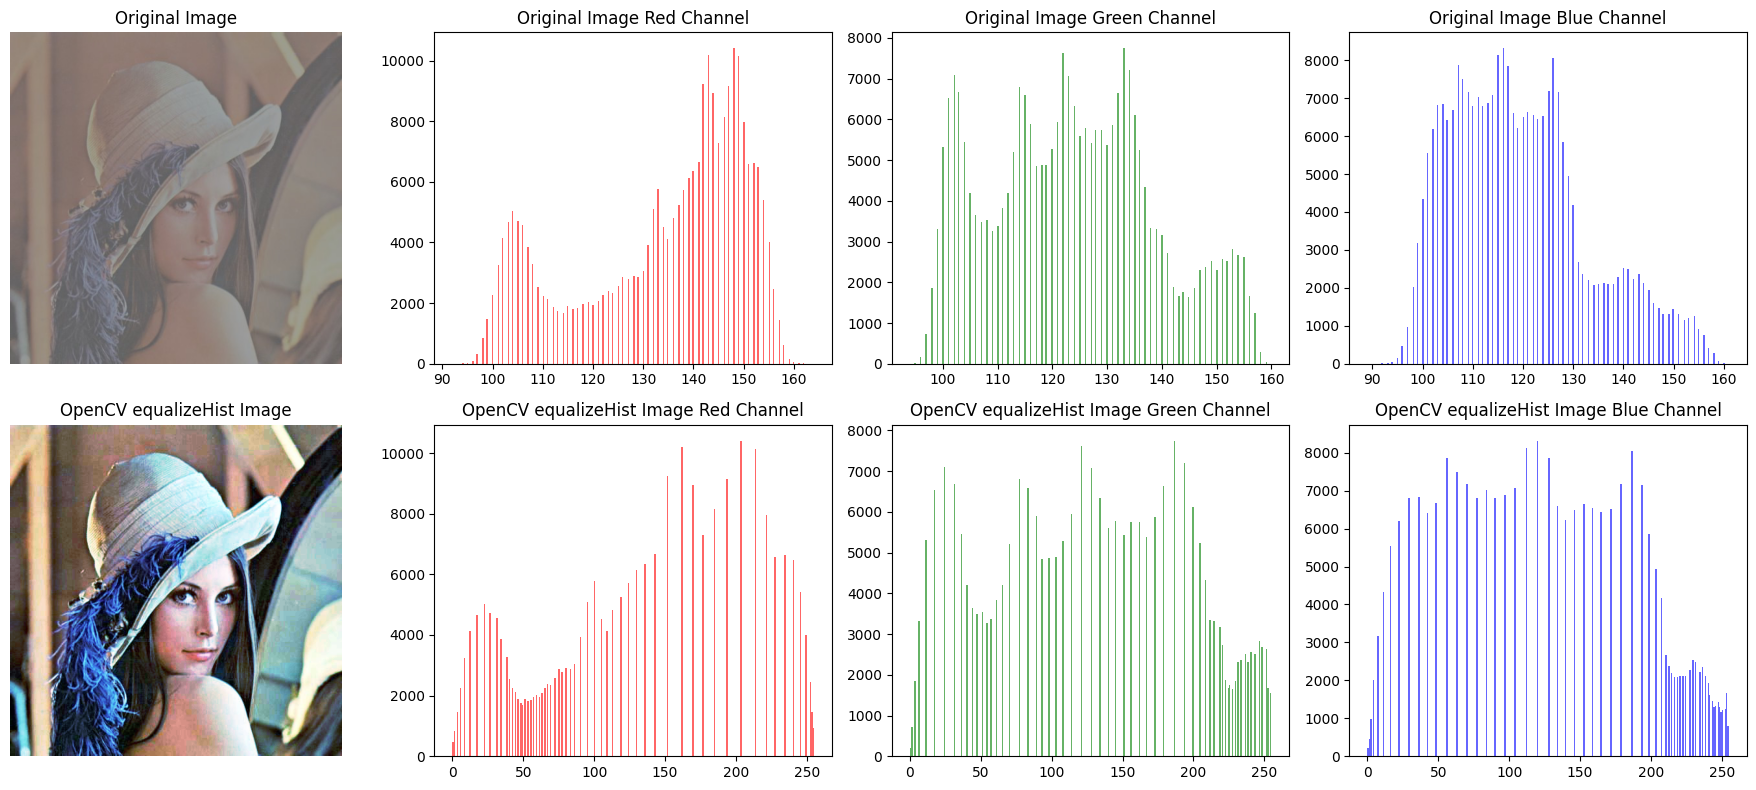

In [ ]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Update the image path
image_path = '/content/drive/MyDrive/Tugas PCVK/Images/lena_lc.jpg'

# Load the image
img_original = Image.open(image_path)
img_array = np.array(img_original)

# Convert the original image to RGB and process each channel for histogram equalization using OpenCV
def cv2_histogram_equalization(image):
    img_array = np.array(image)

    # Separate the color channels
    r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]

    # Equalize each channel using OpenCV's equalizeHist
    r_eq = cv2.equalizeHist(r)
    g_eq = cv2.equalizeHist(g)
    b_eq = cv2.equalizeHist(b)

    # Combine equalized channels back into one image
    img_eq_rgb = np.stack([r_eq, g_eq, b_eq], axis=-1).astype(np.uint8)

    return img_eq_rgb

# Perform manual histogram equalization for each color channel
def histogram_equalization_rgb(image):
    img_array = np.array(image)

    # Separate the color channels
    r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]

    # Equalize each channel manually
    r_eq, _, _ = histogram_equalization(Image.fromarray(r))
    g_eq, _, _ = histogram_equalization(Image.fromarray(g))
    b_eq, _, _ = histogram_equalization(Image.fromarray(b))

    # Combine equalized channels back into one image
    img_eq_rgb = np.stack([r_eq, g_eq, b_eq], axis=-1).astype(np.uint8)

    return img_eq_rgb

# Get the manually equalized image
img_eq_rgb_manual = histogram_equalization_rgb(img_original)

# Get the OpenCV equalized image
img_eq_rgb_cv2 = cv2_histogram_equalization(img_original)

# Function to plot the RGB histograms
def plot_histogram(image, ax, title):
    img_array = np.array(image)
    ax[0].hist(img_array[:,:,0].flatten(), bins=256, color='red', alpha=0.6)
    ax[0].set_title(f'{title} Red Channel')
    ax[1].hist(img_array[:,:,1].flatten(), bins=256, color='green', alpha=0.6)
    ax[1].set_title(f'{title} Green Channel')
    ax[2].hist(img_array[:,:,2].flatten(), bins=256, color='blue', alpha=0.6)
    ax[2].set_title(f'{title} Blue Channel')

# Create figure for displaying images and histograms
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

# Display original image and its histograms
axs[0, 0].imshow(img_original)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

plot_histogram(img_original, axs[0, 1:], "Original Image")

# Display manually equalized image and its histograms
axs[1, 0].imshow(img_eq_rgb_cv2)
axs[1, 0].set_title('OpenCV equalizeHist Image')
axs[1, 0].axis('off')

plot_histogram(img_eq_rgb_cv2, axs[1, 1:], "OpenCV equalizeHist Image")

plt.tight_layout()
plt.show()


7.	Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

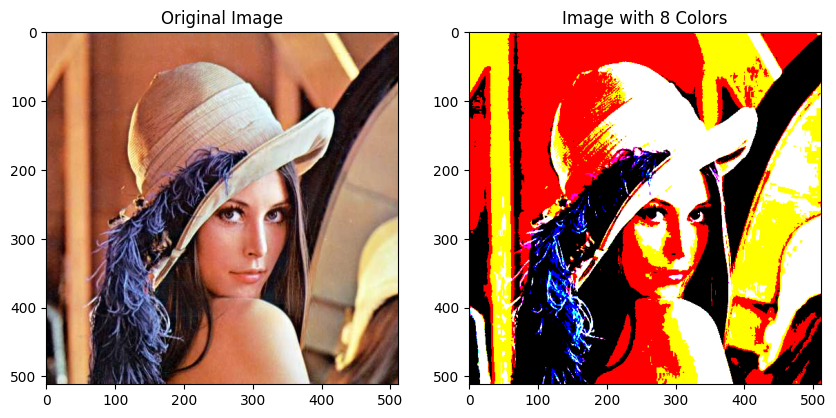

In [ ]:
# Load the image
image_path = "/content/drive/MyDrive/Tugas PCVK/Images/lena.jpg"
image = cv.imread(image_path)

# Convert image to RGB format
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Define color mapping (8 colors: Black, White, Red, Green, Blue, Yellow, Cyan, Magenta)
colors = {
    "black": np.array([0, 0, 0]),
    "white": np.array([255, 255, 255]),
    "red": np.array([255, 0, 0]),
    "green": np.array([0, 255, 0]),
    "blue": np.array([0, 0, 255]),
    "yellow": np.array([255, 255, 0]),
    "cyan": np.array([0, 255, 255]),
    "magenta": np.array([255, 0, 255])
}

# Define thresholds to map pixel values
thresholds = {
    "red": 128,
    "green": 128,
    "blue": 128
}

# Quantize the image to 8 colors
def quantize_color(pixel):
    red, green, blue = pixel
    if red < thresholds["red"] and green < thresholds["green"] and blue < thresholds["blue"]:
        return colors["black"]  # Black
    elif red >= thresholds["red"] and green >= thresholds["green"] and blue >= thresholds["blue"]:
        return colors["white"]  # White
    elif red >= thresholds["red"] and green < thresholds["green"] and blue < thresholds["blue"]:
        return colors["red"]  # Red
    elif red < thresholds["red"] and green >= thresholds["green"] and blue < thresholds["blue"]:
        return colors["green"]  # Green
    elif red < thresholds["red"] and green < thresholds["green"] and blue >= thresholds["blue"]:
        return colors["blue"]  # Blue
    elif red >= thresholds["red"] and green >= thresholds["green"] and blue < thresholds["blue"]:
        return colors["yellow"]  # Yellow
    elif red < thresholds["red"] and green >= thresholds["green"] and blue >= thresholds["blue"]:
        return colors["cyan"]  # Cyan
    elif red >= thresholds["red"] and green < thresholds["green"] and blue >= thresholds["blue"]:
        return colors["magenta"]  # Magenta
    return pixel

# Apply quantization to each pixel
quantized_image = np.apply_along_axis(quantize_color, 2, image_rgb)

# Display the original and quantized image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")

# Quantized image with 8 colors
plt.subplot(1, 2, 2)
plt.imshow(quantized_image)
plt.title("Image with 8 Colors")

plt.show()

8.	Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

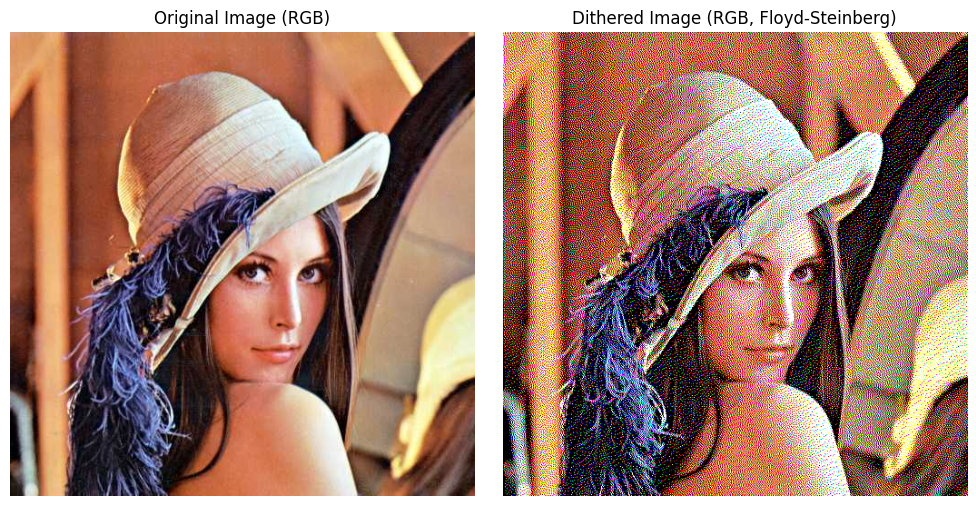

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to apply Floyd-Steinberg dithering to a single channel
def floyd_steinberg_dithering(image_channel):
    # Normalize pixel values to range [0, 1]
    img_normalized = image_channel / 255.0

    # Define the dithering error diffusion matrix for Floyd-Steinberg
    error_diffusion_matrix = np.array([[0, 0, 7],
                                       [3, 5, 1]]) / 16.0

    # Traverse the image and apply dithering
    for y in range(img_normalized.shape[0]):
        for x in range(img_normalized.shape[1]):
            old_pixel = img_normalized[y, x]
            new_pixel = 1.0 if old_pixel > 0.5 else 0.0
            img_normalized[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Distribute the error to neighboring pixels
            for dy in range(2):
                for dx in range(3):
                    nx = x + dx - 1
                    ny = y + dy
                    if nx >= 0 and nx < img_normalized.shape[1] and ny < img_normalized.shape[0]:
                        img_normalized[ny, nx] += quant_error * error_diffusion_matrix[dy, dx]

    # Convert back to 0-255 scale and return as uint8 image
    dithered_channel = (img_normalized * 255).astype(np.uint8)
    return dithered_channel

# Function to apply dithering to an RGB image
def floyd_steinberg_dithering_rgb(image):
    # Split the image into R, G, B channels
    r, g, b = cv2.split(image)

    # Apply dithering to each channel
    r_dithered = floyd_steinberg_dithering(r)
    g_dithered = floyd_steinberg_dithering(g)
    b_dithered = floyd_steinberg_dithering(b)

    # Merge the dithered channels back into an RGB image
    dithered_image_rgb = cv2.merge([r_dithered, g_dithered, b_dithered])

    return dithered_image_rgb

# Load the image (in RGB format)
image_path = '/content/drive/MyDrive/Tugas PCVK/Images/lena.jpg'  # Update with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Floyd-Steinberg dithering to the RGB image
dithered_image_rgb = floyd_steinberg_dithering_rgb(image_rgb)

# Display the original and dithered images
plt.figure(figsize=(10, 5))

# Original RGB image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')

# Dithered RGB image
plt.subplot(1, 2, 2)
plt.imshow(dithered_image_rgb)
plt.title('Dithered Image (RGB, Floyd-Steinberg)')
plt.axis('off')

plt.tight_layout()
plt.show()


9.	Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

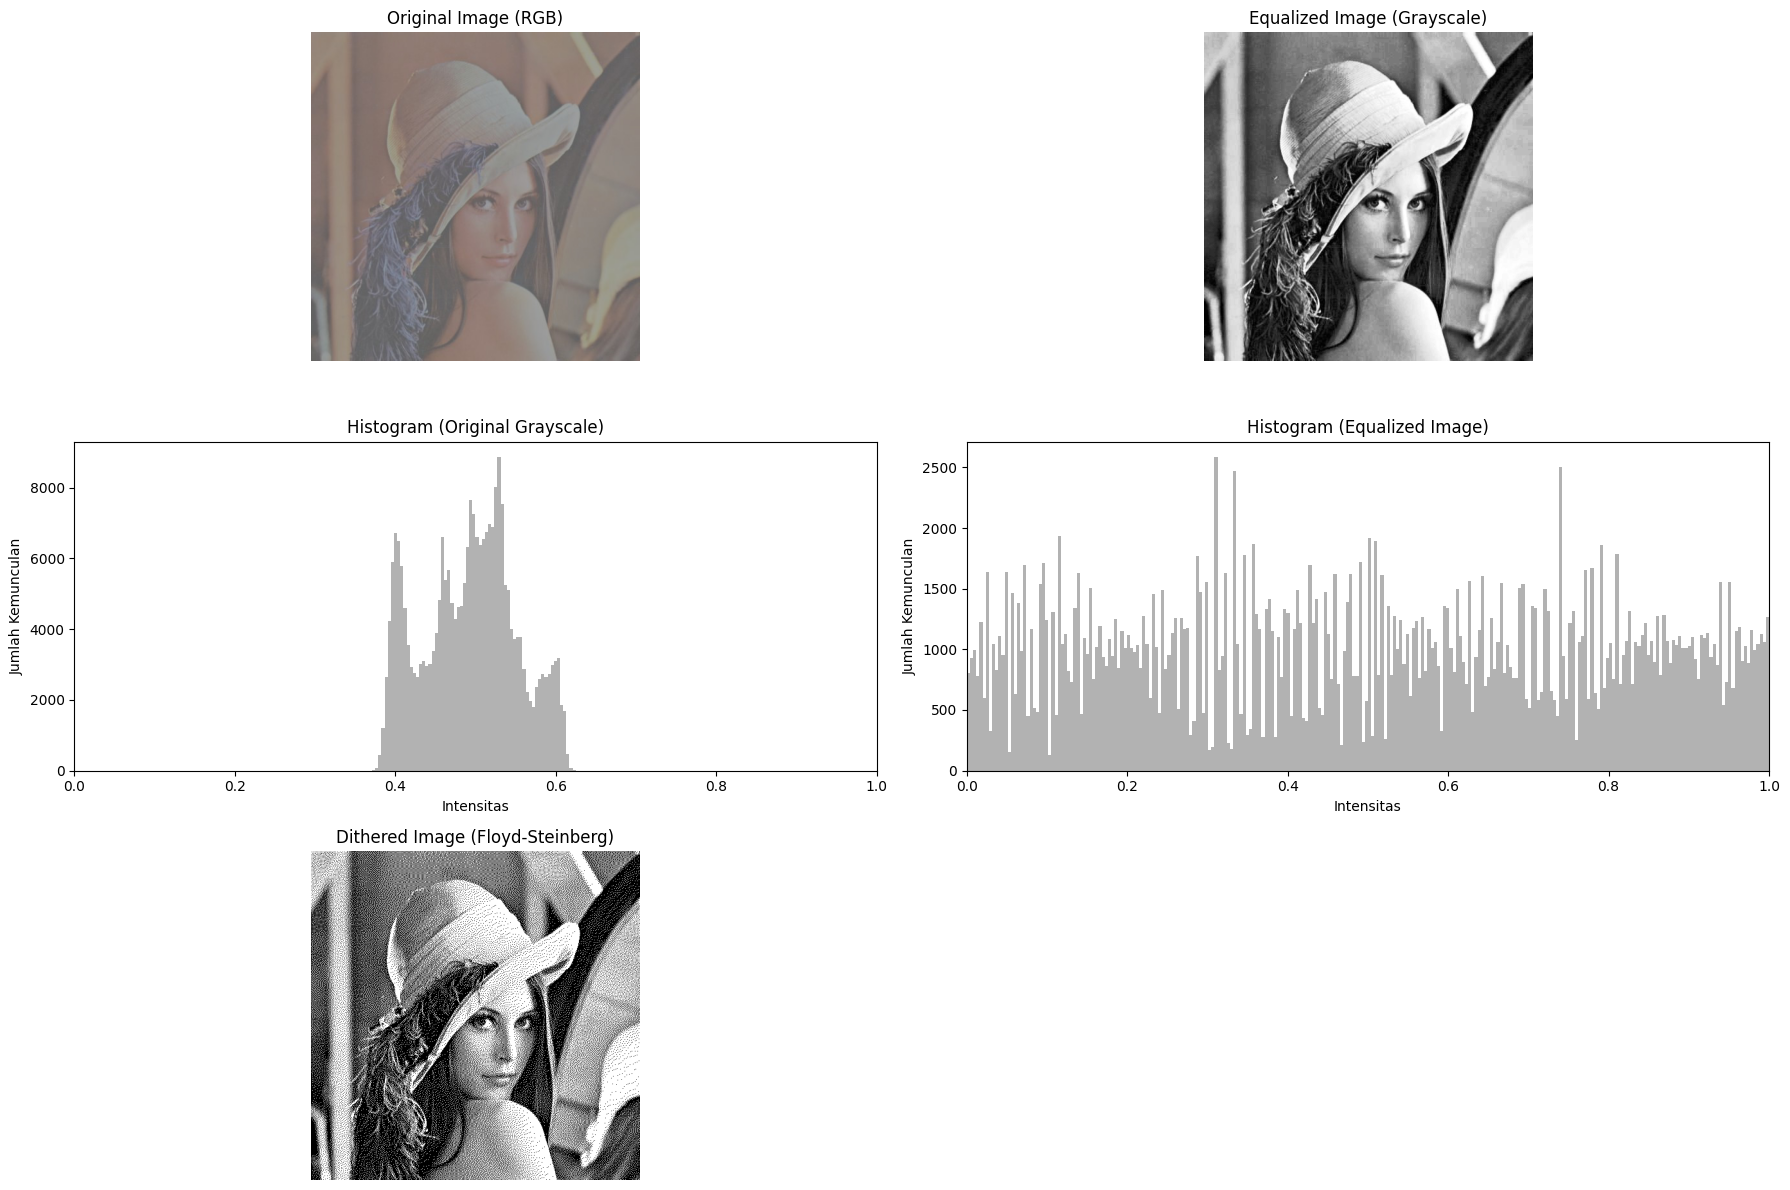

In [ ]:
from skimage import color, exposure, io
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = '/content/drive/MyDrive/Tugas PCVK/Images/lena_lc.jpg'
img = io.imread(image_path)

# 1. Convert to grayscale
gray_img = color.rgb2gray(img)

# 2. Apply histogram equalization
equalized_img = exposure.equalize_hist(gray_img)

def floyd_steinberg_dithering(image, error_weights=(7/16, 3/16, 5/16, 1/16)):
    img = image.copy() * 255  # Scale image to range 0-255
    img = img.astype(np.float32)  # Convert to float for better error handling
    h, w = img.shape

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = np.round(old_pixel / 255) * 255  # Approximate to 0 or 255
            img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < w:
                img[y, x + 1] += quant_error * error_weights[0]  # Right
            if y + 1 < h:
                if x > 0:
                    img[y + 1, x - 1] += quant_error * error_weights[1]  # Below left
                img[y + 1, x] += quant_error * error_weights[2]  # Below
                if x + 1 < w:
                    img[y + 1, x + 1] += quant_error * error_weights[3]  # Below right

    return np.clip(img, 0, 255).astype(np.uint8)  # Clip to valid pixel range and convert to uint8

# Apply dithering on the histogram equalized image
dithered_img = floyd_steinberg_dithering(equalized_img)

# Plot the results and histograms
plt.figure(figsize=(18, 12))

# Baris Pertama: Display original grayscale image dan histogram equalized image
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image (Grayscale)')
plt.axis('off')

# Baris Kedua: Histogram of original grayscale image dan histogram equalized image
plt.subplot(3, 2, 3)
plt.hist(gray_img.ravel(), bins=256, range=(0, 1), color='gray', alpha=0.6)
plt.title('Histogram (Original Grayscale)')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 1)

plt.subplot(3, 2, 4)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 1), color='gray', alpha=0.6)
plt.title('Histogram (Equalized Image)')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 1)

# Baris Ketiga: Display dithered image (Floyd-Steinberg)
plt.subplot(3, 2, 5)
plt.imshow(dithered_img, cmap='gray')
plt.title('Dithered Image (Floyd-Steinberg)')
plt.axis('off')

# Menyesuaikan tata letak agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan hasil
plt.show()